In [44]:
# libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


About dataset:

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

- The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

In [45]:
# data loading
credit_df = pd.read_csv("/content/creditcard.csv")
credit_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Preprocessing

In [46]:
# dropping time col as we dont need it
credit_df = credit_df.drop("Time", axis=1)

In [47]:
credit_df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
# checking for null values
credit_df.isnull().sum()


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [50]:
# treating null values by droping that column as only that col has null values
credit_df.drop(3972, inplace=True)

In [51]:
# performing standardization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [52]:
#standard scaling
credit_df['std_Amount'] = scaler.fit_transform(credit_df['Amount'].values.reshape (-1,1))

#removing Amount col as we dont need it
credit_df = credit_df.drop("Amount", axis=1)

<Axes: xlabel='Class', ylabel='count'>

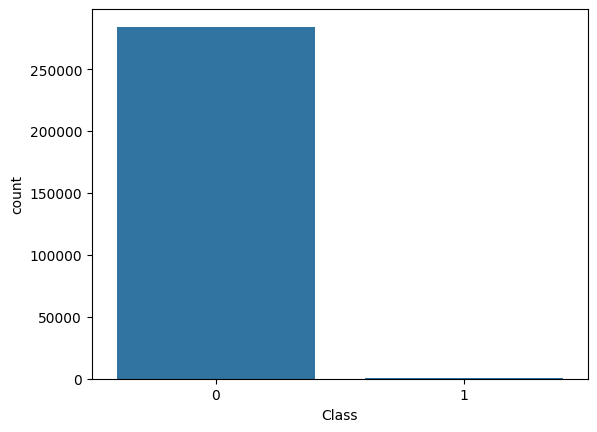

In [53]:
#vis of claas label to show imbalance
sns.countplot(x="Class", data=credit_df)

Huge class imbalance

In [54]:
#treating imbalance by undersampling
import imblearn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [55]:
cols = credit_df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [56]:
#define X and Y
X = credit_df[cols]
Y = credit_df[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [57]:
from pandas import DataFrame

test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

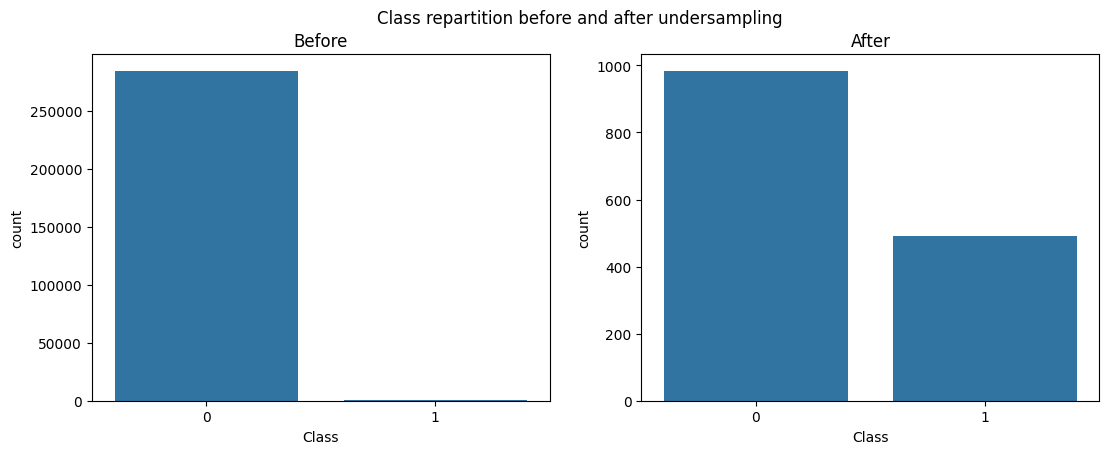

In [58]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit_df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

Reduced class imbalance

In [59]:
# test- train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)


In [60]:
# loading libraries for MLP using keras/tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [61]:
#train the model
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

- The model comprises several dense layers with decreasing numbers of units (32, 16, 8, 4) before the output layer.
Each dense layer utilizes the rectified linear unit (ReLU) activation function, which introduces non-linearity to the model.
- Dropout layers with a dropout rate of 0.2 are added after each dense layer.  
- Dropout helps prevent overfitting by randomly deactivating a fraction of neurons during training.
- The output layer consists of a single unit with a sigmoid activation function, suitable for binary classification tasks. The sigmoid function outputs a probability, representing the likelihood of the sample belonging to the positive class.

In [62]:
# using adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #optimizer

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) #metrics

Adam with a learning rate of 0.001 is assigned to the model for the purpose of updating the network weights based on the computed gradients.

In [63]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=False)

The EarlyStopping callback is a feature in Keras that can be utilized to halt the training process early, preventing overfitting and excessive computation, based on a specified criterion.

In [64]:
history = model.fit(X_train.values, y_train.values, epochs = 6, batch_size=5, validation_split = 0.15, verbose = 0,
                    callbacks = [earlystopper])
history_dict = history.history

Text(0.5, 0, 'Epochs')

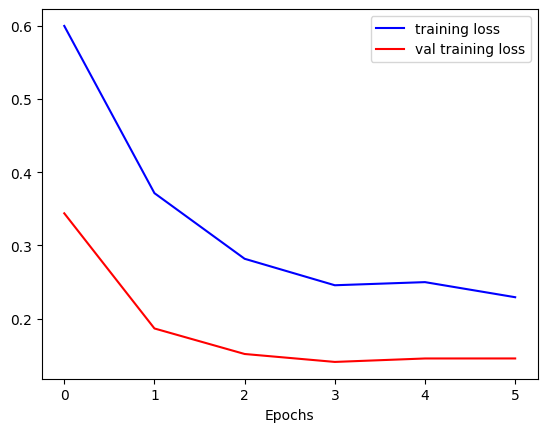

In [65]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

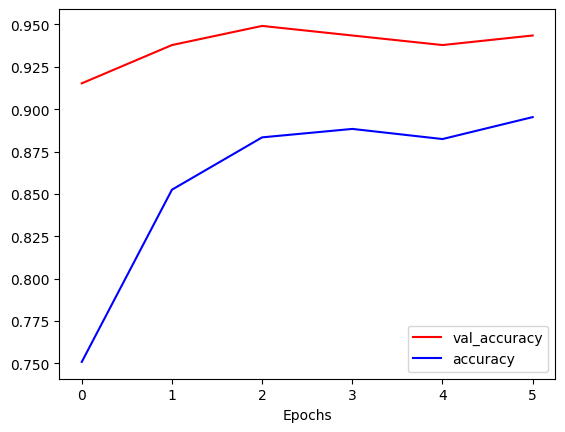

In [66]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

Training loss measures how well the model fits the training data.

Validation loss measures how well the model generalizes to unseen data.

In [67]:
# libraries for evalution of model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [68]:
#predictions
y_pred_nn = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [69]:
# Convert continuous probabilities to binary predictions using a threshold
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)

# Calculate and print accuracy, precision, recall, and F1 score
print("Accuracy Neural Net:", metrics.accuracy_score(y_test, y_pred_nn_binary))
print("Precision Neural Net:", metrics.precision_score(y_test, y_pred_nn_binary))
print("Recall Neural Net:", metrics.recall_score(y_test, y_pred_nn_binary))
print("F1 Score Neural Net:", metrics.f1_score(y_test, y_pred_nn_binary))


Accuracy Neural Net: 0.9425675675675675
Precision Neural Net: 0.9504950495049505
Recall Neural Net: 0.8888888888888888
F1 Score Neural Net: 0.9186602870813396


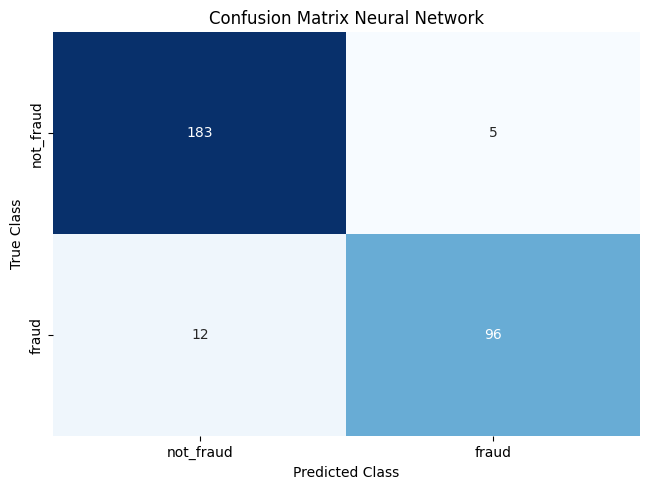

In [70]:
#Confusion matrix
matrix_nn = confusion_matrix(y_test, y_pred_nn_binary)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [71]:
#AUC
y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

10/10 [==============================] - 0s 2ms/step
AUC Neural Net:  0.9747832939322301


Score of 0.9688 is very close to 1, indicating that the model is able to correctly classify most of the transactions, both fraudulent and non-fraudulent.

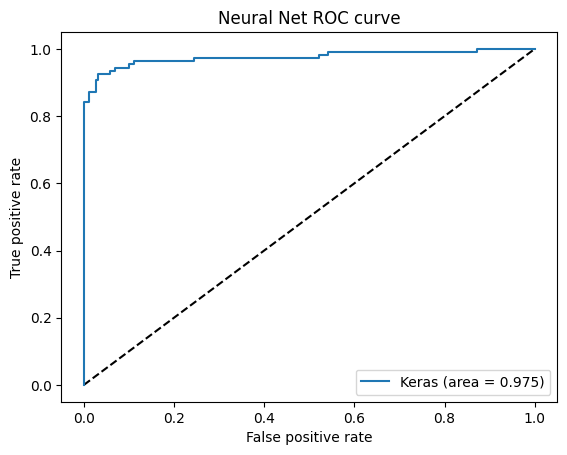

In [72]:
#ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

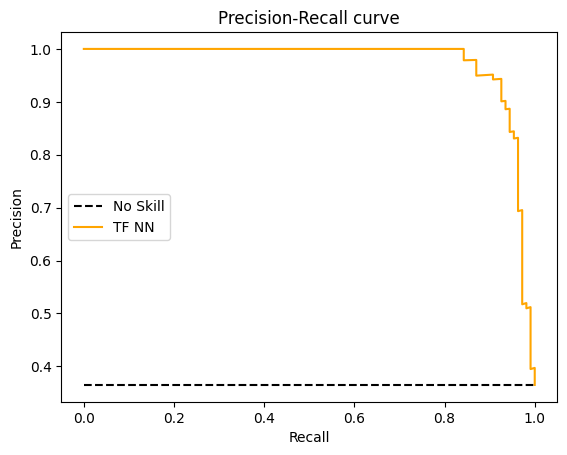

In [73]:
# precision-recall curve
nn_precision, nn_recall, _ = precision_recall_curve(y_test, y_pred_nn_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nn_recall, nn_precision, color='orange', label='TF NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()